In [64]:
from linearmodels.panel import PanelOLS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

path = 'C:/Users/0630r/inha2/Research/Dart/Dart_file/real_code/pqt_file/'
plt.rc('axes', unicode_minus = False) # 마이너스 기호 깨질 때 사용 
plt.rc('font', family='Malgun Gothic') # 맑은 고딕 한글 사용

In [65]:
## 오차항의 자기상관성 파악해야함
## TobinsQ로 분석한  kci 논문 베껴서 모델링 

In [66]:
total_df = pd.read_parquet(path + 'total_df.pqt', engine = 'pyarrow')

In [67]:
total_df

,회사명,시기,매출,영업이익,총당기순이익,영업이익률,연구개발비,TobinsQ,업종분류코드,시장,...,입찰횟수_지자체,평균참여수_지자체,낙찰금액_지자체,낙찰수_지자체,입찰횟수_국가기관,평균참여수_국가기관,낙찰금액_국가기관,낙찰수_국가기관,낙찰여부,입찰여부
0,3S,20201,225.92015,4.671810e+08,0.000000e+00,0.020679,0.53236,2.191006,C,KOSDAQ,...,0.0,0.0,0.0,0.0,1.0,4.0,4.800000e+08,1.0,True,True
1,3S,20202,42.65512,-3.499970e+08,-4.673000e+08,-0.082053,0.83971,2.289685,C,KOSDAQ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,False,False
2,3S,20203,109.70647,-8.039280e+08,-1.181574e+09,-0.073280,0.90663,2.044231,C,KOSDAQ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,False,False
3,3S,20204,197.35145,-6.666700e+08,-9.868740e+08,-0.033781,0.97934,1.862129,C,KOSDAQ,...,0.0,0.0,0.0,0.0,8.0,4.0,2.221000e+09,5.0,True,True
4,3S,20211,234.77908,-1.408266e+09,6.953350e+08,-0.059983,0.93628,1.974030,C,KOSDAQ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20129,힘스,20204,1062.06150,2.496818e+10,1.720465e+10,0.235092,39.28327,1.237415,C,KOSDAQ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,False,False
20130,힘스,20211,105.63849,-1.882489e+09,-1.472020e+08,-0.178201,9.43167,1.320697,C,KOSDAQ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,False,False
20131,힘스,20212,249.83122,-2.604794e+09,-5.351920e+08,-0.104262,18.86100,1.214401,C,KOSDAQ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,False,False
20132,힘스,20213,456.55920,2.519869e+09,4.704930e+09,0.055193,37.64687,0.962185,C,KOSDAQ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,False,False


In [68]:
total_df.describe() # index,연구개발비 억단위로 짤라서 맞춰주면된다.

,시기,매출,영업이익,총당기순이익,영업이익률,연구개발비,TobinsQ,종업원수,낙찰금액,입찰횟수_공기업,...,낙찰금액_공기업,낙찰수_공기업,입찰횟수_지자체,평균참여수_지자체,낙찰금액_지자체,낙찰수_지자체,입찰횟수_국가기관,평균참여수_국가기관,낙찰금액_국가기관,낙찰수_국가기관
count,20134.000000,2.013400e+04,2.013400e+04,2.013400e+04,20134.000000,20134.000000,20134.000000,2.013400e+04,20134.000000,20134.000000,...,2.013400e+04,20134.000000,20134.000000,20134.000000,2.013400e+04,20134.000000,20134.000000,20134.000000,2.013400e+04,20134.000000
mean,20212.756283,7.790608e+03,5.340114e+10,4.305797e+10,0.043511,165.040727,0.972133,9.693064e+02,2.004393,0.121585,...,5.376318e+07,0.011076,0.111801,0.274509,2.443431e+07,0.016887,0.376180,0.351727,1.222418e+08,0.082845
std,8.175851,5.686002e+04,7.424481e+11,6.876366e+11,0.087007,3723.564006,1.170730,9.513228e+03,43.430895,1.152512,...,3.272937e+09,0.136027,1.105909,15.123187,7.401522e+08,0.193299,5.496764,12.556230,2.644832e+09,0.803120
min,20201.000000,7.035430e+00,-5.846499e+12,-5.215581e+12,-0.209388,0.000000,0.000244,1.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,20204.000000,3.143012e+02,8.938725e+07,0.000000e+00,0.002398,0.000000,0.388978,1.030000e+02,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,20213.000000,8.290120e+02,3.206938e+09,2.455074e+09,0.041915,3.945830,0.677731,2.130000e+02,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,20222.000000,2.641685e+03,1.448974e+10,1.172053e+10,0.092972,20.747003,1.169020,4.710000e+02,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
max,20224.000000,3.022314e+06,5.163386e+13,5.565408e+13,0.272725,250042.160000,42.231655,1.045154e+06,3643.000000,49.000000,...,3.643000e+11,5.000000,47.000000,1509.000000,7.524770e+10,12.000000,456.000000,1154.000000,1.654788e+11,61.000000


In [69]:
total_dfT = total_df[total_df['입찰여부'] == True]
total_dfTT = total_dfT[total_dfT['낙찰여부'] == True]

In [70]:
# # 영업이익률 scaling
# scaler = StandardScaler()
# col = total_df[['영업이익률']] # 이정도면 그냥 하자
# scaled_col=scaler.fit_transform(col)
# total_df['영업이익률'] = scaled_col

# # 연구개발비 scaling
# scaler1 = MinMaxScaler()
# col1 = total_df[['연구개발비']]
# scaled_col1=scaler1.fit_transform(col1)
# total_df['연구개발비'] = scaled_col1
# total_df['연구개발비'].describe()

<Axes: xlabel='종업원수', ylabel='Count'>

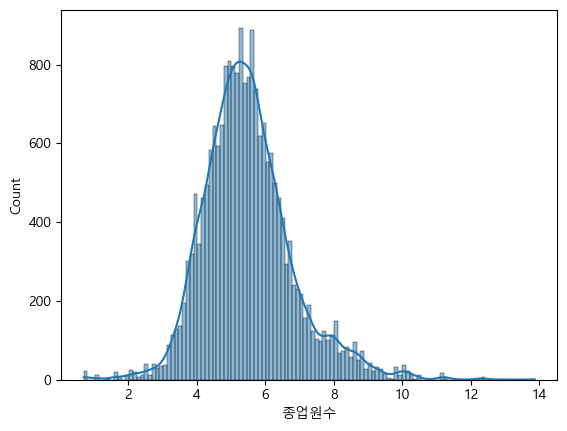

In [71]:
sns.histplot(total_df, x=np.log1p(total_df['종업원수']), kde=True )

<Axes: xlabel='영업이익률', ylabel='Count'>

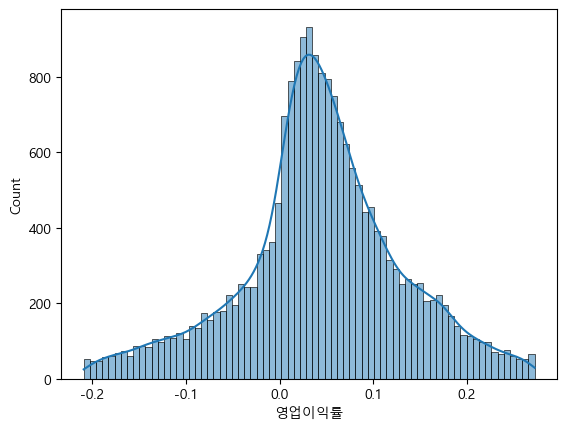

In [72]:
sns.histplot(total_df, x=total_df['영업이익률'], kde=True )

<Axes: xlabel='연구개발비', ylabel='Count'>

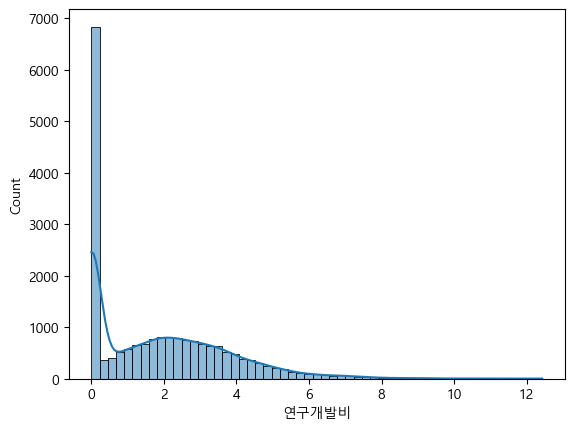

In [73]:
sns.histplot(total_df, x=np.log1p(total_df['연구개발비']), kde=True ) 

<Axes: xlabel='낙찰금액', ylabel='Count'>

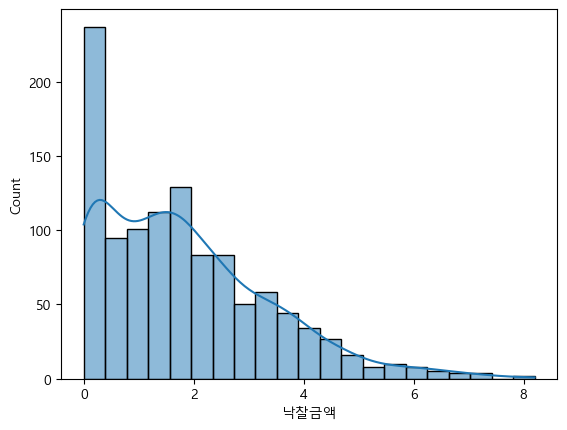

In [74]:
sns.histplot(total_df, x=np.log1p(total_dfTT['낙찰금액']), kde=True)

<Axes: xlabel='매출', ylabel='Count'>

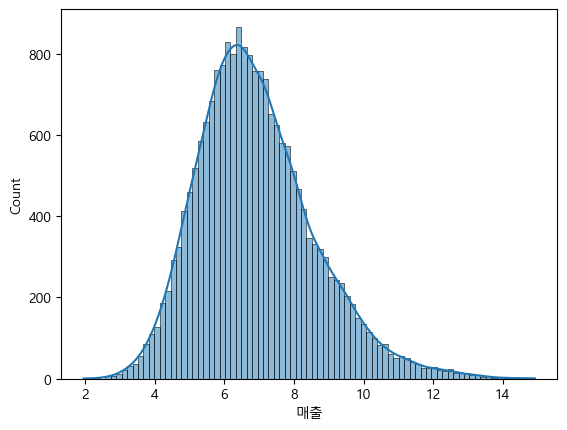

In [75]:
sns.histplot(total_df, x=np.log(total_df['매출']), kde=True )

<Axes: xlabel='TobinsQ', ylabel='Count'>

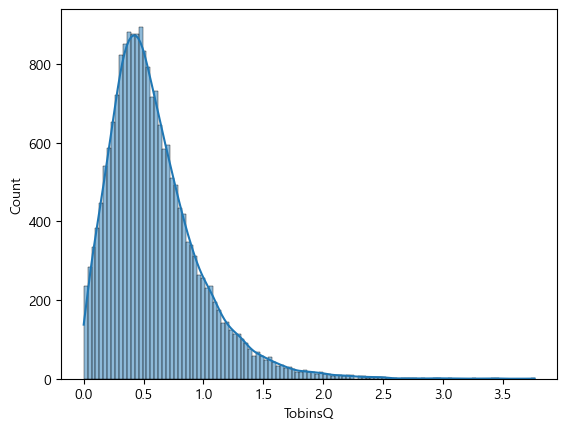

In [76]:
sns.histplot(total_df, x=np.log1p(total_df['TobinsQ']), kde=True ) ## 토빈스Q를 log1p해서 넣으면 대체로 정규분포를 띈다.  # quardartic term: (한기업 연구개발비 / 해당 시기 연구개발비)*2 - 하나의 변수로 제공  // (i 기업 시가총액 / 해당 시기 시가총액)*2

## quardartic term 넣어서  

In [77]:
# control = 입찰여부, 낙찰여부, np.log1p(낙찰금액) + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p('종업원수')

## PanelOLS

In [78]:
mod1 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + EntityEffects + TimeEffects', data = total_df.set_index(["회사명","시기"])) # 교호작용 term (보정효과 투입) 
res1 =mod1.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
res1

Dep. Variable:,np.log1p(TobinsQ),R-squared:,1.691e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0007
No. Observations:,20134,R-squared (Within):,-5.144e-05
Date:,"Thu, Sep 14 2023",R-squared (Overall):,-0.0007
Time:,18:37:30,Log-likelihood,1.068e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,0.3048
Entities:,2096,P-value,0.5809
Avg Obs:,9.6059,Distribution:,"F(1,18026)"
Min Obs:,1.0000,,
Max Obs:,12.000,F-statistic (robust):,0.6392


In [79]:
# np.log(낙찰금액) + np.log(매출) + 영업이익률 + np.log(연구개발비) + np.log1p('종업원수')

In [80]:
mod2 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + np.log1p(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = total_df.set_index(["회사명","시기"]))
res2 =mod2.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
res2

Dep. Variable:,np.log1p(TobinsQ),R-squared:,0.0086
Estimator:,PanelOLS,R-squared (Between):,0.3205
No. Observations:,20134,R-squared (Within):,0.0082
Date:,"Thu, Sep 14 2023",R-squared (Overall):,0.3367
Time:,18:37:35,Log-likelihood,1.076e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,31.376
Entities:,2096,P-value,0.0000
Avg Obs:,9.6059,Distribution:,"F(5,18022)"
Min Obs:,1.0000,,
Max Obs:,12.000,F-statistic (robust):,7.3129


In [81]:
mod3 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + EntityEffects + TimeEffects', data = total_dfT.set_index(["회사명","시기"]))
res3 =mod3.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
res3

Dep. Variable:,np.log1p(TobinsQ),R-squared:,9.822e-06
Estimator:,PanelOLS,R-squared (Between):,-0.0012
No. Observations:,2208,R-squared (Within):,-1.985e-05
Date:,"Thu, Sep 14 2023",R-squared (Overall):,-0.0014
Time:,18:37:38,Log-likelihood,1470.3
Cov. Estimator:,Clustered,,
,,F-statistic:,0.0163
Entities:,535,P-value,0.8984
Avg Obs:,4.1271,Distribution:,"F(1,1661)"
Min Obs:,1.0000,,
Max Obs:,12.000,F-statistic (robust):,0.0089


In [82]:
mod4 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + np.log1p(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = total_dfT.set_index(["회사명","시기"]))
res4 =mod4.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
res4

Dep. Variable:,np.log1p(TobinsQ),R-squared:,0.0058
Estimator:,PanelOLS,R-squared (Between):,-0.2624
No. Observations:,2208,R-squared (Within):,-0.0026
Date:,"Thu, Sep 14 2023",R-squared (Overall):,-0.2802
Time:,18:37:47,Log-likelihood,1476.7
Cov. Estimator:,Clustered,,
,,F-statistic:,1.9316
Entities:,535,P-value,0.0861
Avg Obs:,4.1271,Distribution:,"F(5,1657)"
Min Obs:,1.0000,,
Max Obs:,12.000,F-statistic (robust):,0.9589


In [83]:
mod5 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + EntityEffects + TimeEffects', data = total_dfTT.set_index(["회사명","시기"])) # 낙찰받은 기업 중 낙찰금액에 따른 Tobins'Q 비교
mod5 = mod5.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
mod5

Dep. Variable:,np.log1p(TobinsQ),R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,-0.0171
No. Observations:,1110,R-squared (Within):,0.0004
Date:,"Thu, Sep 14 2023",R-squared (Overall):,-0.0196
Time:,18:37:52,Log-likelihood,876.84
Cov. Estimator:,Clustered,,
,,F-statistic:,0.8310
Entities:,366,P-value,0.3623
Avg Obs:,3.0328,Distribution:,"F(1,732)"
Min Obs:,1.0000,,
Max Obs:,12.000,F-statistic (robust):,0.6277


In [86]:
mod6 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = total_dfTT.set_index(["회사명","시기"]))
mod6 = mod6.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
mod6

Dep. Variable:,np.log1p(TobinsQ),R-squared:,0.0045
Estimator:,PanelOLS,R-squared (Between):,0.4951
No. Observations:,1110,R-squared (Within):,-0.0059
Date:,"Thu, Sep 14 2023",R-squared (Overall):,0.5074
Time:,18:38:13,Log-likelihood,878.71
Cov. Estimator:,Clustered,,
,,F-statistic:,0.6572
Entities:,366,P-value,0.6561
Avg Obs:,3.0328,Distribution:,"F(5,728)"
Min Obs:,1.0000,,
Max Obs:,12.000,F-statistic (robust):,0.1928


In [85]:
# mod1 = PanelOLS.from_formula('TobinsQ ~ 입찰여부', total_df)
# res1 =mod1.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
# mod2 = PanelOLS.from_formula('TobinsQ ~ 입찰여부 + np.log(매출) + 영업이익률 + 종업원수 + np.log1p(연구개발비) + EntityEffects + TimeEffects', total_df)
# res2 =mod2.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)
# out = Stargazer([res1, res2])
# out
# PanelOLS에서는 stargazer가 안된다. 

## 6개 parameter 한번에 확인

In [99]:
from linearmodels.panel import PanelOLS
import pandas as pd

# 'total_df'가 패널 데이터셋이라고 가정합니다.

# 모델 1
mod1 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + EntityEffects + TimeEffects', data = total_df.set_index(["회사명","시기"])) # 교호작용 term (보정효과 투입) 
res1 =mod1.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)

# 모델 2
mod2 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = total_df.set_index(["회사명","시기"]))
res2 =mod2.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)

# 모델 3
mod3 = PanelOLS.from_formula('TobinsQ ~ 낙찰여부 + EntityEffects + TimeEffects', data = total_dfT.set_index(["회사명","시기"]))
res3 = mod3.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 4
mod4 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = total_dfT.set_index(["회사명","시기"]))
res4 = mod4.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)

# 모델 5
mod5 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + EntityEffects + TimeEffects', data = total_dfTT.set_index(["회사명","시기"]))
res5 = mod5.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)


# 모델 6
mod6 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = total_dfTT.set_index(["회사명","시기"]))
res6 = mod6.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)


# 결과 출력
results1 = pd.DataFrame({'Model 1': res1.params, 'Model 2': res2.params, 'Model 3': res3.params, 'Model 4': res4.params, 'Model 5': res5.params, 'Model 6': res6.params})
print(results1)

                  Model 1   Model 2   Model 3   Model 4  Model 5   Model 6
np.log(매출)            NaN -0.021138       NaN -0.043934      NaN  0.004812
np.log1p(낙찰금액)        NaN       NaN       NaN       NaN  -0.0044 -0.004897
np.log1p(연구개발비)       NaN -0.003853       NaN -0.001397      NaN  0.011054
np.log1p(종업원수)        NaN  0.057550       NaN  0.035513      NaN  0.038869
낙찰여부                  NaN       NaN -0.028066 -0.002095      NaN       NaN
영업이익률                 NaN  0.083830       NaN  0.113357      NaN -0.038235
입찰여부            -0.002846 -0.004606       NaN       NaN      NaN       NaN


###  Pooled OLS

In [100]:
from statsmodels.formula.api import ols
m1 = ols("np.log1p(TobinsQ) ~ 입찰여부 + C(시기) + C(시장) + np.log(매출) + np.log1p(연구개발비) + 영업이익률 + np.log1p(종업원수)", total_df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log1p(TobinsQ)   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     234.8
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:44   Log-Likelihood:                -7098.5
No. Observations:               20134   AIC:                         1.424e+04
Df Residuals:                   20115   BIC:                         1.439e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8903      0.028     32.342      0.000       0.836       0.944
입찰여부[T.True]       -0.0485      0.008     -6.183      0.000      -0.064      -0.033
C(시기)[T.20202]      0.0834      0.013      6.667      0.000       0.059       0.108
C(시기)[T.20203]      0.1676      0.013     13.289      0.000       0.143       0.192
C(시기)[T.20204]      0.2131      0.013     16.871      0.000       0.188       0.238
C(시기)[T.20211]      0.1314      0.012     10.755      0.000       0.107       0.155
C(시기)[T.20212]      0.2214      0.012     18.071      0.000       0.197       0.245
C(시기)[T.20213]      0.2596      0.012     20.912      0.000       0.235       0.284
C(시기)[T.20214]      0.2418      0.013     19.297      0.000       0.217       0.266
C(시기)[T.20221]      0.0988      0.012      8.061      0.000       0.075       0.123
C(시기)[T.20222]      0.1534      0.012     12.534      0.000       0.129       0.177
C(시기)[T.20223]      0.1269      0.013     10.058      0.000       0.102       0.152
C(시기)[T.20224]      0.1384      0.013     10.980      0.000       0.114       0.163
C(시장)[T.KOSDAQ]    -0.0407      0.025     -1.653      0.098      -0.089       0.008
C(시장)[T.KOSPI]     -0.0798      0.025     -3.138      0.002      -0.130      -0.030
np.log(매출)         -0.1138      0.002    -45.953      0.000      -0.119      -0.109
np.log1p(연구개발비)     0.0365      0.001     25.463      0.000       0.034       0.039
영업이익률               0.3098      0.028     10.877      0.000       0.254       0.366
np.log1p(종업원수)      0.0565      0.003     20.063      0.000       0.051       0.062
==============================================================================
Omnibus:                     4973.230   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15898.104
Skew:                           1.255   Prob(JB):                         0.00
Kurtosis:                       6.556   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
m2 = ols("np.log1p(TobinsQ) ~ 낙찰여부 + C(시기) + C(시장) + np.log(매출) + np.log1p(연구개발비) + 영업이익률 + np.log1p(종업원수)", total_dfT).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log1p(TobinsQ)   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.88
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.45e-69
Time:                        18:49:44   Log-Likelihood:                -543.82
No. Observations:                2208   AIC:                             1126.
Df Residuals:                    2189   BIC:                             1234.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6379      0.064      9.897      0.000       0.511       0.764
낙찰여부[T.True]        0.0119      0.014      0.882      0.378      -0.015       0.038
C(시기)[T.20202]      0.0527      0.033      1.589      0.112      -0.012       0.118
C(시기)[T.20203]      0.1705      0.035      4.924      0.000       0.103       0.238
C(시기)[T.20204]      0.1948      0.034      5.714      0.000       0.128       0.262
C(시기)[T.20211]      0.1041      0.034      3.083      0.002       0.038       0.170
C(시기)[T.20212]      0.1802      0.033      5.517      0.000       0.116       0.244
C(시기)[T.20213]      0.2184      0.034      6.401      0.000       0.152       0.285
C(시기)[T.20214]      0.1897      0.035      5.368      0.000       0.120       0.259
C(시기)[T.20221]      0.0583      0.037      1.586      0.113      -0.014       0.130
C(시기)[T.20222]      0.0991      0.034      2.935      0.003       0.033       0.165
C(시기)[T.20223]      0.0947      0.036      2.625      0.009       0.024       0.165
C(시기)[T.20224]      0.0861      0.036      2.368      0.018       0.015       0.157
C(시장)[T.KOSDAQ]     0.0706      0.054      1.295      0.195      -0.036       0.177
C(시장)[T.KOSPI]      0.0138      0.058      0.240      0.811      -0.099       0.127
np.log(매출)         -0.0973      0.008    -11.785      0.000      -0.114      -0.081
np.log1p(연구개발비)     0.0170      0.004      4.509      0.000       0.010       0.024
영업이익률               0.4725      0.083      5.712      0.000       0.310       0.635
np.log1p(종업원수)      0.0647      0.010      6.752      0.000       0.046       0.083
==============================================================================
Omnibus:                      466.759   Durbin-Watson:                   0.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1248.441
Skew:                           1.115   Prob(JB):                    8.02e-272
Kurtosis:                       5.931   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
m2 = ols("np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + C(시기) + C(시장) + np.log(매출) + np.log1p(연구개발비) + 영업이익률 + np.log1p(종업원수)", total_dfT).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log1p(TobinsQ)   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     22.93
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.75e-69
Time:                        18:49:45   Log-Likelihood:                -543.46
No. Observations:                2208   AIC:                             1125.
Df Residuals:                    2189   BIC:                             1233.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6371      0.064      9.890      0.000       0.511       0.763
C(시기)[T.20202]      0.0540      0.033      1.628      0.104      -0.011       0.119
C(시기)[T.20203]      0.1705      0.035      4.925      0.000       0.103       0.238
C(시기)[T.20204]      0.1964      0.034      5.759      0.000       0.130       0.263
C(시기)[T.20211]      0.1052      0.034      3.114      0.002       0.039       0.171
C(시기)[T.20212]      0.1819      0.033      5.567      0.000       0.118       0.246
C(시기)[T.20213]      0.2203      0.034      6.458      0.000       0.153       0.287
C(시기)[T.20214]      0.1919      0.035      5.430      0.000       0.123       0.261
C(시기)[T.20221]      0.0575      0.037      1.563      0.118      -0.015       0.130
C(시기)[T.20222]      0.1007      0.034      2.980      0.003       0.034       0.167
C(시기)[T.20223]      0.0964      0.036      2.672      0.008       0.026       0.167
C(시기)[T.20224]      0.0890      0.036      2.449      0.014       0.018       0.160
C(시장)[T.KOSDAQ]     0.0702      0.054      1.289      0.197      -0.037       0.177
C(시장)[T.KOSPI]      0.0118      0.058      0.205      0.838      -0.101       0.125
np.log1p(낙찰금액)     -0.0059      0.005     -1.218      0.223      -0.015       0.004
np.log(매출)         -0.0977      0.008    -11.858      0.000      -0.114      -0.082
np.log1p(연구개발비)     0.0176      0.004      4.678      0.000       0.010       0.025
영업이익률               0.4687      0.083      5.660      0.000       0.306       0.631
np.log1p(종업원수)      0.0669      0.010      6.990      0.000       0.048       0.086
==============================================================================
Omnibus:                      466.081   Durbin-Watson:                   0.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1241.043
Skew:                           1.116   Prob(JB):                    3.24e-270
Kurtosis:                       5.917   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# sns.histplot(total_df1, x=np.log1p(total_df1['TobinsQ']), kde=True )
# sns.histplot(total_df1, x=np.log(total_df1['매출']), kde=True )
# sns.histplot(total_df1, x=np.log(total_df1['영업이익률']), kde=True ) # 둘의 차이가 없다
# sns.histplot(total_df1, x=np.log(total_df1['총당기순이익']), kde=True )

## KOSPI

In [114]:
## KOSPI
kospi = total_df[total_df['시장'] == 'KOSPI']
kospi_T = kospi[kospi['입찰여부'] == True]
kospi_TT = kospi_T[kospi_T['낙찰여부'] == True]

# 모델 1
mod1 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + EntityEffects + TimeEffects', data = kospi.set_index(['회사명', '시기']))
res1 = mod1.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 2
mod2 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = kospi.set_index(['회사명', '시기']))
res2 = mod2.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)


# 모델 3
mod3 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + EntityEffects + TimeEffects', data = kospi.set_index(['회사명', '시기']))
res3 = mod3.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 4
mod4 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = kospi.set_index(['회사명', '시기']))
res4 = mod4.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 5
mod5 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + EntityEffects + TimeEffects', data = kospi_TT.set_index(["회사명","시기"]))
res5 = mod5.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)


# 모델 6
mod6 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = kospi_TT.set_index(["회사명","시기"]))
res6 = mod6.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)

# 결과 출력
results_kospi = pd.DataFrame({'Model 1': res1.params, 'Model 2': res2.params, 'Model 3': res3.params, 'Model 4': res4.params, 'Model 5': res5.params, 'Model 6': res6.params})
print(results_kospi)

                  Model 1   Model 2   Model 3   Model 4   Model 5   Model 6
np.log(매출)            NaN -0.007854       NaN -0.007801       NaN  0.157809
np.log1p(낙찰금액)        NaN       NaN       NaN       NaN -0.002673 -0.001949
np.log1p(연구개발비)       NaN -0.001718       NaN -0.001746       NaN  0.011929
np.log1p(종업원수)        NaN  0.017367       NaN  0.017361       NaN  0.045669
낙찰여부                  NaN       NaN  0.005736  0.005647       NaN       NaN
영업이익률                 NaN  0.060128       NaN  0.059785       NaN -0.063663
입찰여부             0.000119 -0.000236       NaN       NaN       NaN       NaN


### KOSPI Pooled OLS

In [115]:
# from statsmodels.formula.api import ols
# m1 = ols("TobinsQ ~ 입찰여부 + C(시기) + C(시장) + np.log(매출) + 연구개발비 + 영업이익률 + 종업원수", kospi).fit()
# m1.summary()

## KOSDAQ

In [126]:
## kosdaq
kosdaq = total_df[total_df['시장'] == 'KOSDAQ']
kosdaq_T = kosdaq[kosdaq['입찰여부'] == True]
kosdaq_TT = kosdaq[kosdaq['낙찰여부'] == True]


mod1 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + EntityEffects + TimeEffects', data = kosdaq.set_index(['회사명', '시기']))
res1 = mod1.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 2
mod2 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = kosdaq.set_index(['회사명', '시기']))
res2 = mod2.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)


# 모델 3
mod3 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + EntityEffects + TimeEffects', data = kosdaq_T.set_index(['회사명', '시기']))
res3 = mod3.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 4
mod4 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = kosdaq_T.set_index(['회사명', '시기']))
res4 = mod4.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 5
mod5 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + EntityEffects + TimeEffects', data = kosdaq_TT.set_index(["회사명","시기"]))
res5 = mod5.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)

# 모델 6
mod6 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ np.log1p(낙찰금액) + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = kosdaq_TT.set_index(["회사명","시기"]))
res6 = mod6.fit(cov_type = "clustered", cluster_entity=True, cluster_time =True)

# 결과 출력
results_kosdaq = pd.DataFrame({'Model 1': res1.params, 'Model 2': res2.params, 'Model 3': res3.params, 'Model 4': res4.params, 'Model 5': res5.params, 'Model 6': res6.params})
print(results_kosdaq)

                  Model 1   Model 2  Model 3   Model 4   Model 5   Model 6
np.log(매출)            NaN -0.027877      NaN -0.069820       NaN -0.044780
np.log1p(낙찰금액)        NaN       NaN      NaN       NaN -0.003769 -0.003714
np.log1p(연구개발비)       NaN -0.004694      NaN -0.005391       NaN  0.018787
np.log1p(종업원수)        NaN  0.077196      NaN  0.050061       NaN  0.047978
낙찰여부                  NaN       NaN -0.00272 -0.005760       NaN       NaN
영업이익률                 NaN  0.105708      NaN  0.159504       NaN -0.009218
입찰여부            -0.003496 -0.006631      NaN       NaN       NaN       NaN


In [150]:
kosdaq_TT

,회사명,시기,매출,영업이익,총당기순이익,영업이익률,연구개발비,TobinsQ,업종분류코드,시장,...,입찰횟수_지자체,평균참여수_지자체,낙찰금액_지자체,낙찰수_지자체,입찰횟수_국가기관,평균참여수_국가기관,낙찰금액_국가기관,낙찰수_국가기관,낙찰여부,입찰여부
0,3S,20201,225.92015,4.671810e+08,0.000000e+00,0.020679,0.53236,2.191006,C,KOSDAQ,...,0.0,0.0,0.0,0.0,1.0,4.0,4.800000e+08,1.0,True,True
3,3S,20204,197.35145,-6.666700e+08,-9.868740e+08,-0.033781,0.97934,1.862129,C,KOSDAQ,...,0.0,0.0,0.0,0.0,8.0,4.0,2.221000e+09,5.0,True,True
6,3S,20213,114.20087,1.056624e+09,1.119823e+09,0.092523,0.07009,2.622229,C,KOSDAQ,...,0.0,0.0,0.0,0.0,6.0,2.5,4.032690e+09,4.0,True,True
7,3S,20214,180.62117,2.022128e+09,2.141911e+09,0.111954,0.10942,2.623711,C,KOSDAQ,...,0.0,0.0,0.0,0.0,2.0,2.0,4.875000e+08,1.0,True,True
10,3S,20223,179.64947,7.391330e+08,1.027373e+09,0.041143,0.07866,1.882604,C,KOSDAQ,...,0.0,0.0,0.0,0.0,3.0,2.0,2.734000e+09,2.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,휴네시온,20211,45.16916,9.314300e+07,1.213890e+08,0.020621,20.10452,1.442957,J,KOSDAQ,...,0.0,0.0,0.0,0.0,1.0,1.0,9.130000e+07,1.0,True,True
19932,휴네시온,20212,107.65986,5.559320e+08,5.187970e+08,0.051638,38.08928,1.698301,J,KOSDAQ,...,0.0,0.0,0.0,0.0,1.0,1.0,9.716850e+07,1.0,True,True
19934,휴네시온,20214,265.42242,2.879700e+09,1.488742e+10,0.108495,76.56661,0.964121,J,KOSDAQ,...,0.0,0.0,0.0,0.0,1.0,1.0,1.837000e+07,1.0,True,True
19935,휴네시온,20222,109.60856,-4.679190e+08,-2.680730e+08,-0.042690,42.49911,0.949530,J,KOSDAQ,...,0.0,0.0,0.0,0.0,1.0,1.0,6.050000e+07,1.0,True,True


### KOSDAQ Pooled OLS

In [127]:
# from statsmodels.formula.api import ols
# m1 = ols("TobinsQ ~ 입찰여부 + C(시기) + C(시장) + np.log(매출) + 연구개발비 + 영업이익률 + 종업원수", kosdaq).fit()
# m1.summary()

## KONEX

In [152]:
## konex
konex = total_df[total_df['시장'] == 'KONEX']
konex_T = konex[konex['입찰여부'] == True]
konex_TT = konex[konex['낙찰여부'] == True]


mod1 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + EntityEffects + TimeEffects', data = konex.set_index(['회사명', '시기']))
res1 = mod1.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 2
mod2 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 입찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = konex.set_index(['회사명', '시기']))
res2 = mod2.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 3
mod3 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + EntityEffects + TimeEffects', data = konex_T.set_index(['회사명', '시기']))
res3 = mod3.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 모델 4
mod4 = PanelOLS.from_formula('np.log1p(TobinsQ) ~ 낙찰여부 + np.log(매출) + 영업이익률 + np.log1p(연구개발비) + np.log1p(종업원수) + EntityEffects + TimeEffects', data = konex_T.set_index(['회사명', '시기']))
res4 = mod4.fit(cov_type="clustered", cluster_entity=True, cluster_time=True)

# 나머지 konex_TT의 경우 데이터의 갯수가 매우 적음 -> 모델 오류 발생

# 결과 출력
results_konex = pd.DataFrame({'Model 1': res1.params, 'Model 2': res2.params, 'Model 3': res3.params, 'Model 4': res4.params})
print(results_konex)

                  Model 1   Model 2   Model 3   Model 4
np.log(매출)            NaN -0.031774       NaN -0.011840
np.log1p(연구개발비)       NaN -0.019518       NaN -0.209360
np.log1p(종업원수)        NaN  0.048343       NaN  0.034013
낙찰여부                  NaN       NaN -0.134435 -0.016600
영업이익률                 NaN -0.099278       NaN -0.498374
입찰여부            -0.120614 -0.117685       NaN       NaN


In [153]:
konex_TT

,회사명,시기,매출,영업이익,총당기순이익,영업이익률,연구개발비,TobinsQ,업종분류코드,시장,...,입찰횟수_지자체,평균참여수_지자체,낙찰금액_지자체,낙찰수_지자체,입찰횟수_국가기관,평균참여수_국가기관,낙찰금액_국가기관,낙찰수_국가기관,낙찰여부,입찰여부
828,KC산업,20204,733.82798,5.375632e+09,1.680226e+09,0.073255,11.12265,0.476392,C,KONEX,...,2.0,1.0,4.910000e+09,1.0,1.0,0.0,0.000000e+00,0.0,True,True
829,KC산업,20211,188.58386,7.614450e+08,3.147600e+08,0.040377,1.44813,0.574278,C,KONEX,...,1.0,0.0,0.000000e+00,0.0,1.0,1.0,1.148797e+08,1.0,True,True
1756,SK시그넷,20214,799.69402,2.355794e+09,-2.687060e+08,0.029459,38.08020,0.260809,C,KONEX,...,0.0,0.0,0.000000e+00,0.0,3.0,2.5,9.266950e+08,2.0,True,True
1757,SK시그넷,20224,1626.31496,3.485850e+09,7.446019e+09,0.021434,108.36385,0.104395,C,KONEX,...,0.0,0.0,0.000000e+00,0.0,2.0,1.0,9.170000e+08,1.0,True,True
2963,나눔테크,20204,88.41307,1.635576e+09,1.550843e+09,0.184993,4.55170,0.129238,C,KONEX,...,0.0,0.0,0.000000e+00,0.0,1.0,4.0,2.640000e+07,1.0,True,True
9379,썬테크,20204,207.00488,3.593390e+08,1.382190e+08,0.017359,0.57777,1.151534,C,KONEX,...,0.0,0.0,0.000000e+00,0.0,1.0,1.0,3.112999e+09,1.0,True,True
9380,썬테크,20214,167.94341,3.920230e+08,4.472170e+08,0.023343,1.42580,1.031902,C,KONEX,...,1.0,1.0,1.030000e+08,1.0,3.0,0.0,0.000000e+00,0.0,True,True
9381,썬테크,20224,217.61632,5.715300e+07,-3.955410e+08,0.002626,2.70163,0.868767,C,KONEX,...,1.0,0.0,0.000000e+00,0.0,3.0,10.0,5.738000e+08,1.0,True,True
10178,아하,20224,563.55567,5.336268e+09,3.859977e+09,0.094689,16.27838,0.116302,C,KONEX,...,0.0,0.0,0.000000e+00,0.0,1.0,1.0,2.827000e+07,1.0,True,True
11122,에이펙스인텍,20204,206.53383,5.944120e+08,7.467880e+08,0.028780,7.87639,1.701327,C,KONEX,...,1.0,0.0,0.000000e+00,0.0,6.0,1.0,4.090000e+05,1.0,True,True


### KONEX Poolded OLS

In [84]:
# from statsmodels.formula.api import ols
# m1 = ols("TobinsQ ~ 입찰여부 + C(시기) + C(시장) + np.log(매출) + 연구개발비 + 영업이익률 + 종업원수", konex).fit()
# m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TobinsQ   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.564
Date:                Tue, 08 Aug 2023   Prob (F-statistic):            0.00116
Time:                        00:40:16   Log-Likelihood:                -215.54
No. Observations:                 238   AIC:                             465.1
Df Residuals:                     221   BIC:                             524.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.0497      1.201      4.205      0.000       2.683       7.417
입찰여부[T.True]      -0.2465      0.117     -2.105      0.036      -0.477      -0.016
C(시기)[T.20202]    -0.0410      0.772     -0.053      0.958      -1.562       1.480
C(시기)[T.20203]     0.1698      0.775      0.219      0.827      -1.357       1.697
C(시기)[T.20204]     0.3805      0.650      0.586      0.559      -0.900       1.661
C(시기)[T.20211]     0.3918      0.768      0.510      0.610      -1.121       1.905
C(시기)[T.20212]     0.5395      0.880      0.613      0.541      -1.196       2.275
C(시기)[T.20213]     0.5402      0.773      0.699      0.485      -0.982       2.063
C(시기)[T.20214]     0.5494      0.648      0.848      0.398      -0.728       1.827
C(시기)[T.20221]    -0.0532      0.881     -0.060      0.952      -1.789       1.682
C(시기)[T.20222]     0.0822      0.880      0.093      0.926      -1.652       1.816
C(시기)[T.20223]     0.1638      0.882      0.186      0.853      -1.574       1.901
C(시기)[T.20224]     0.4049      0.648      0.625      0.533      -0.873       1.683
np.log(매출)        -0.1836      0.050     -3.674      0.000      -0.282      -0.085
연구개발비           4.501e-11    3.5e-11      1.287      0.199   -2.39e-11    1.14e-10
영업이익률              0.0252      0.010      2.489      0.014       0.005       0.045
종업원수              -0.0007      0.001     -0.721      0.472      -0.002       0.001
==============================================================================
Omnibus:                        7.745   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.726
Skew:                           0.438   Prob(JB):                       0.0210
Kurtosis:                       3.100   Cond. No.                     8.80e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.8e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## 회귀분석 표 csv 파일로 찍어서 excel로 만들기  